In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

from sklearn import svm
from sklearn import metrics #Import for accuracy calculation

In [2]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')

In [ ]:
#SVM 
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness','speechiness','tempo','valence']

def doPCA(df, features):
    df_kmeans = df[features]
    pca = PCA(n_components = 3)
    X = pca.fit_transform(df_kmeans)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    X_reduced = pd.DataFrame(X)
    X_reduced['year_bins'] = df['year_bins']
    X_reduced['popularity_cut'] = df['popularity_cut']
    X_reduced['popularity_qcut'] = df['popularity_qcut']
    
    X_new = pca.inverse_transform(X)
    X_new = pd.DataFrame(X_new, columns=features)
    X_new['year_bins'] = df['year_bins']
    X_new['popularity_cut'] = df['popularity_cut']
    X_new['popularity_qcut'] = df['popularity_qcut']
    return X_reduced, X_new

# def doSVM(popularity_var, kernel='rbf', afterPCA=False):
popularity_var='popularity_cut'
kernel='rbf'
afterPCA=True
df_test = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_train.csv')
if afterPCA:
    X_reduced, df_test = doPCA(df_test, features)
    X_reduced, df_train = doPCA(df_train, features)
    df_test.info()
X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]
#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))
#     return clf, y_pred

# clf_rbf, y_pred_rbf = doSVM('popularity_cut', afterPCA=True)

In [6]:
from sklearn.metrics import classification_report

In [8]:
#SVM 
features = ['acousticness', 'energy', 'instrumentalness', 'loudness','speechiness','tempo']

## Valence, liveness, danceability removed

def doPCA(df, features):
    df_kmeans = df[features]
    pca = PCA(n_components = 3)
    X = pca.fit_transform(df_kmeans)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    X_reduced = pd.DataFrame(X)
    X_reduced['year_bins'] = df['year_bins']
    X_reduced['popularity_cut'] = df['popularity_cut']
    X_reduced['popularity_qcut'] = df['popularity_qcut']
    
    X_new = pca.inverse_transform(X)
    X_new = pd.DataFrame(X_new, columns=features)
    X_new['year_bins'] = df['year_bins']
    X_new['popularity_cut'] = df['popularity_cut']
    X_new['popularity_qcut'] = df['popularity_qcut']
    return X_reduced, X_new

# def doSVM(popularity_var, kernel='rbf', afterPCA=False):
popularity_var='popularity_qcut'
kernel='linear'
afterPCA=False
df_test = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_train.csv')
if afterPCA:
    X_reduced, df_test = doPCA(df_test, features)
    X_reduced, df_train = doPCA(df_train, features)
    df_test.info()
X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]
#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel, C=0.05) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))
#     return clf, y_pred

# clf_rbf, y_pred_rbf = doSVM('popularity_cut', afterPCA=True)

Accuracy: 0.5112118180213054
SVM done! Time elapsed: 668.625813961029 seconds


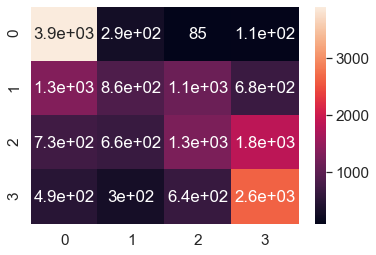

In [9]:
# clf_linear, y_pred_linear = doSVM('popularity_cut','linear', afterPCA=True)

# confusion_matrix(y_)

df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True) # font size
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      4383
           1       0.41      0.21      0.28      4014
           2       0.41      0.28      0.33      4513
           3       0.50      0.65      0.57      4081

    accuracy                           0.51     16991
   macro avg       0.48      0.51      0.47     16991
weighted avg       0.48      0.51      0.48     16991



In [9]:
popularity_var='popularity_qcut'
kernel='linear'
afterPCA=False
df_test = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_'+popularity_var+'_train.csv')

X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]
#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))

Accuracy: 0.6143252310046495
SVM done! Time elapsed: 689.8177180290222 seconds


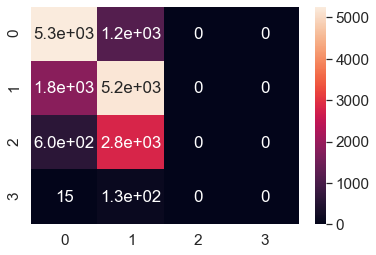

In [10]:
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True) # font size

plt.show()